### EDA - Compara


In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [382]:
# todos los datos
df = pd.read_csv("csv/ts.csv", parse_dates=["fecha"],
                   dtype={"especie": "string",
                          "LST_Day": "float64",
                          "LST_Night": "float64",
                          "LST": "float64",
                          "mes": "int"
                         })
df.head(10)

,fecha,especie,LST_Day,LST_Night,LST,mes
0,2020-01-01,estepa,36.280639,11.242220,23.761430,1
1,2020-01-01,pino,30.976251,11.761687,21.368969,1
2,2020-01-09,estepa,33.107195,7.384291,20.245743,1
3,2020-01-09,pino,26.849177,7.588929,17.219053,1
4,2020-01-17,estepa,40.126597,12.101199,26.113898,1
5,2020-01-17,pino,33.924788,13.115697,23.520243,1
6,2020-01-25,estepa,34.904348,8.871062,21.887705,1
7,2020-01-25,pino,28.310403,9.221731,18.766067,1
8,2020-02-02,estepa,34.400693,8.121886,21.261290,2
9,2020-02-02,pino,27.574299,8.396090,17.985194,2


In [383]:
# Temperaturas diurnas
df_d = pd.read_csv("csv/ts_d.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,36.280639,30.976251,1,5.304388
1,2020-01-09,33.107195,26.849177,1,6.258017
2,2020-01-17,40.126597,33.924788,1,6.201808
3,2020-01-25,34.904348,28.310403,1,6.593945
4,2020-02-02,34.400693,27.574299,2,6.826394
5,2020-02-10,30.593728,25.033515,2,5.560213
6,2020-02-18,31.541956,25.955979,2,5.585977
7,2020-02-26,36.649758,31.037088,2,5.612670
8,2020-03-05,30.742659,25.520392,3,5.222267
9,2020-03-13,28.569933,23.153814,3,5.416119


In [384]:
# Temperaturas diurnas (diarias)
df_d_diaria = pd.read_csv("csv/ts_d_diario.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d_diaria.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,35.433453,33.666374,1,1.767079
1,2020-01-02,36.195872,31.342840,1,4.853032
2,2020-01-03,35.245773,31.284172,1,3.961601
3,2020-01-04,38.821326,31.450303,1,7.371023
4,2020-01-05,NaN,17.944593,1,NaN
5,2020-01-06,NaN,NaN,1,NaN
6,2020-01-07,25.590980,19.523039,1,6.067942
7,2020-01-08,NaN,NaN,1,NaN
8,2020-01-09,NaN,NaN,1,NaN
9,2020-01-10,27.450967,22.472114,1,4.978853


In [385]:
# Temperaturas diurnas (diarias) imputadas
df_d_diaria_i = pd.read_csv("csv/ts_d_diario_imputado.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d_diaria_i.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,35.433453,33.666374,1,1.767079
1,2020-01-02,36.195872,31.342840,1,4.853032
2,2020-01-03,35.245773,31.284172,1,3.961601
3,2020-01-04,38.821326,31.450303,1,7.371023
4,2020-01-05,25.626907,17.944593,1,7.682314
5,2020-01-06,24.419361,19.761171,1,4.658190
6,2020-01-07,25.590980,19.523039,1,6.067942
7,2020-01-08,23.595392,18.317425,1,5.277967
8,2020-01-09,24.220856,18.704153,1,5.516703
9,2020-01-10,27.450967,22.472114,1,4.978853


In [386]:
# Temperaturas nocturnas
df_n = pd.read_csv("csv/ts_n.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_n.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,11.242220,11.761687,1,-0.519467
1,2020-01-09,7.384291,7.588929,1,-0.204639
2,2020-01-17,12.101199,13.115697,1,-1.014498
3,2020-01-25,8.871062,9.221731,1,-0.350669
4,2020-02-02,8.121886,8.396090,2,-0.274203
5,2020-02-10,9.759583,9.951060,2,-0.191477
6,2020-02-18,7.807707,8.423232,2,-0.615526
7,2020-02-26,10.897478,12.161442,2,-1.263965
8,2020-03-05,8.705064,9.558947,3,-0.853883
9,2020-03-13,5.640340,6.618134,3,-0.977794


In [387]:
# Temperaturas nocturnas (diarias)
df_n_diaria = pd.read_csv("csv/ts_n_diario.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_n_diaria.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,12.923966,14.703904,1,-1.779938
1,2020-01-02,12.885076,13.202792,1,-0.317715
2,2020-01-03,12.973098,13.577900,1,-0.604802
3,2020-01-04,12.445712,12.293340,1,0.152373
4,2020-01-05,NaN,7.932499,1,NaN
5,2020-01-06,NaN,NaN,1,NaN
6,2020-01-07,4.402563,6.985357,1,-2.582794
7,2020-01-08,NaN,NaN,1,NaN
8,2020-01-09,NaN,NaN,1,NaN
9,2020-01-10,4.718868,4.187017,1,0.531851


In [388]:
# Temperaturas nocturnas (diarias) imputadas
df_n_diaria_i = pd.read_csv("csv/ts_n_diario_imputado.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_n_diaria_i.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,12.923966,14.703904,1,-1.779938
1,2020-01-02,12.885076,13.202792,1,-0.317715
2,2020-01-03,12.973098,13.577900,1,-0.604802
3,2020-01-04,12.445712,12.293340,1,0.152373
4,2020-01-05,5.412971,7.932499,1,-2.519528
5,2020-01-06,4.451458,5.671738,1,-1.220280
6,2020-01-07,4.402563,6.985357,1,-2.582794
7,2020-01-08,3.443552,4.069965,1,-0.626413
8,2020-01-09,3.615139,4.149127,1,-0.533987
9,2020-01-10,4.718868,4.187017,1,0.531851


### Comparación de series de tiempo diarias y 8D

In [389]:
# colores para los gráficos
colores = {
    'estepa': '#FF6347',    # Rojo anaranjado
    'pino':   '#2E8B57',    # Verde bosque
    'dia':    '#FFA726',    # Naranja suave
    'noche':  '#4169E1',    # Azul royal
    'train': '#9E9E9E',     # Gris medio
    'test': '#2B2B2B',      # Gris oscuro
    'HW': '#00FA9A',        # Verde menta
    'SARIMA': '#6A5ACD',    # Lavanda
    'SARIMA_IC': '#C5B4E3', # Lavanda claro
    'LSTM': '#E57373'       # Rojo suave
    }

In [390]:
def plot_2_series(inicio='2020-01-01',fin='2020-04-01', col='pino', imputados=True):
    
    if (imputados):
        a = 1
    else:
        a = 0.6 # alpha

    df_d_range = df_d[(df_d['fecha'] >= inicio) & (df_d['fecha'] <= fin)]
    df_n_range = df_n[(df_n['fecha'] >= inicio) & (df_n['fecha'] <= fin)]
    
    df_d_diaria_range = df_d_diaria[(df_d_diaria['fecha'] >= inicio) & (df_d_diaria['fecha'] <= fin)]
    df_n_diaria_range = df_n_diaria[(df_n_diaria['fecha'] >= inicio) & (df_n_diaria['fecha'] <= fin)]

    df_d_diaria_i_range = df_d_diaria_i[(df_d_diaria['fecha'] >= inicio) & (df_d_diaria_i['fecha'] <= fin)]
    df_n_diaria_i_range = df_n_diaria_i[(df_n_diaria['fecha'] >= inicio) & (df_n_diaria_i['fecha'] <= fin)]

    fig, axs = plt.subplots(2, 1, figsize=(12, 7), sharex=True)  # 2 filas, 1 columna
    
    # --- Gráfico día ---
    if (imputados):
        axs[0].bar(df_d_diaria_i_range['fecha'], df_d_diaria_i_range[col], color='black', alpha=a)
    axs[0].bar(df_d_diaria_range['fecha'], df_d_diaria_range[col], color=colores['dia'], alpha=a)
    axs[0].plot(df_d_range['fecha'], df_d_range[col], color='red', marker='o')
    
    axs[0].set_title(f"Temperaturas {col} - Día ({inicio} - {fin})")
    axs[0].set_ylabel("temp")
    axs[0].grid(axis='y')
    
    # --- Gráfico noche ---
    if (imputados):
        axs[1].bar(df_n_diaria_i_range['fecha'], df_n_diaria_i_range[col], color='black', alpha=a)
    axs[1].bar(df_n_diaria_range['fecha'], df_n_diaria_range[col], color=colores['noche'], alpha=a)
    axs[1].plot(df_n_range['fecha'], df_n_range[col], color='red', marker='o')

    axs[1].set_title(f"Temperaturas {col} - Noche ({inicio} - {fin})")
    axs[1].set_ylabel("temp")
    axs[1].grid(axis='y')
    
    # Eje X compartido
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

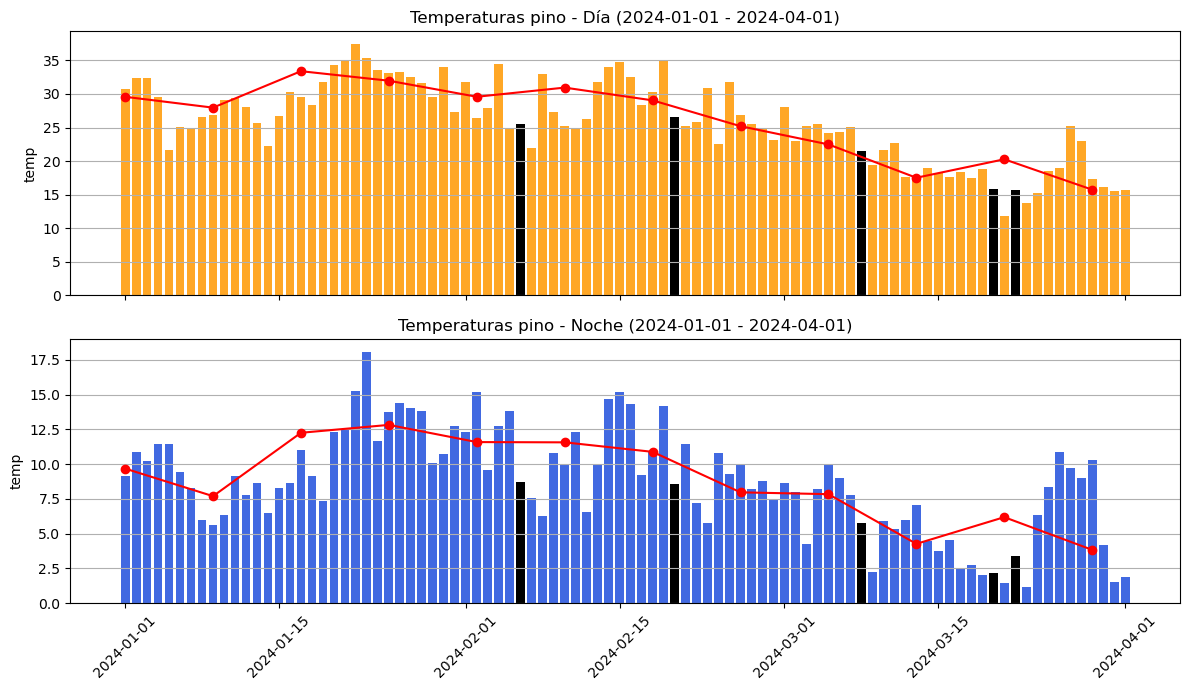

In [391]:
plot_2_series('2024-01-01', '2024-04-01', 'pino', imputados=True)

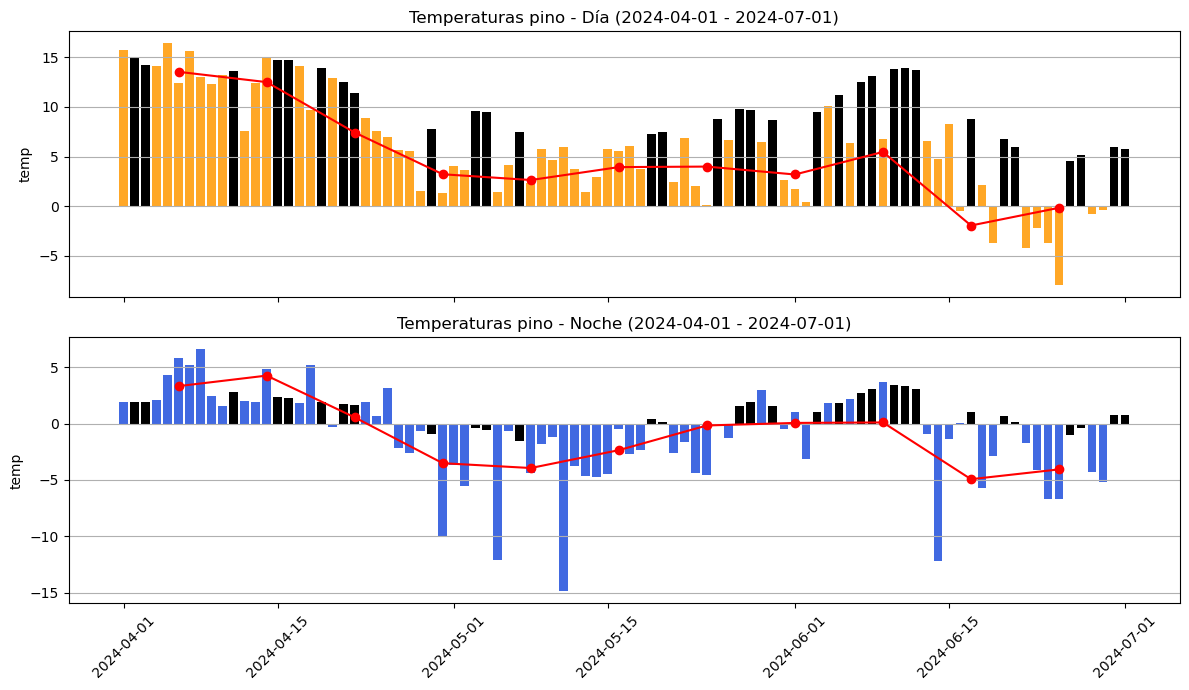

In [392]:
plot_2_series('2024-04-01', '2024-07-01', 'pino')

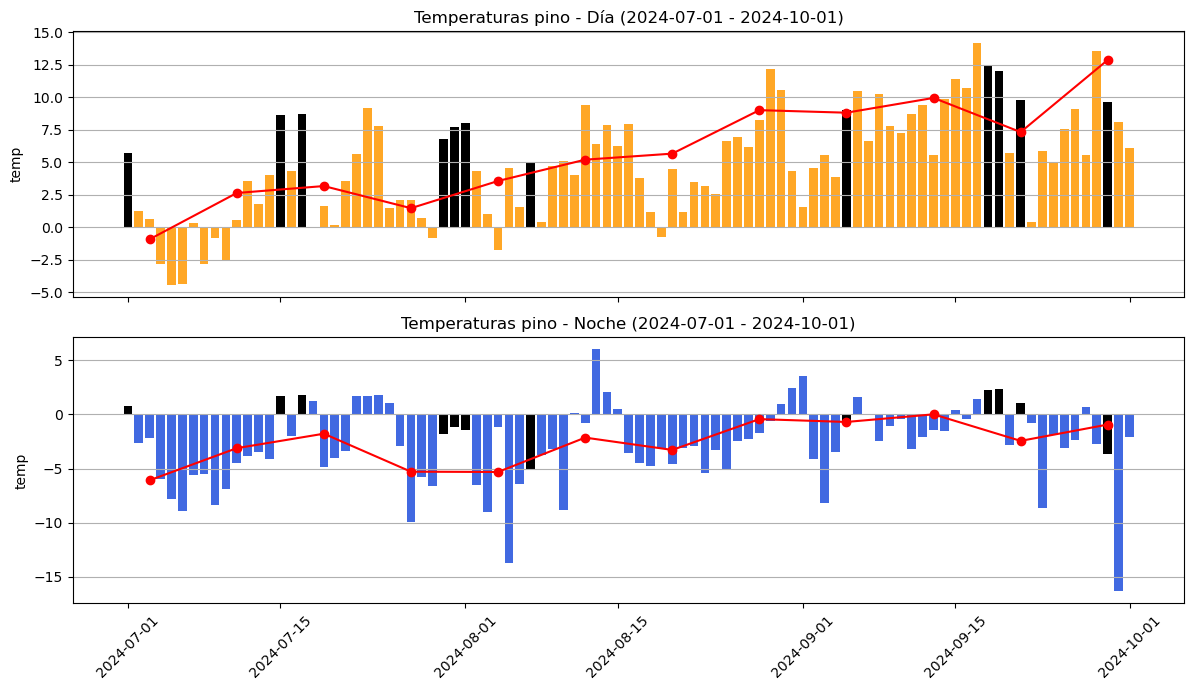

In [393]:
plot_2_series('2024-07-01', '2024-10-01', 'pino')

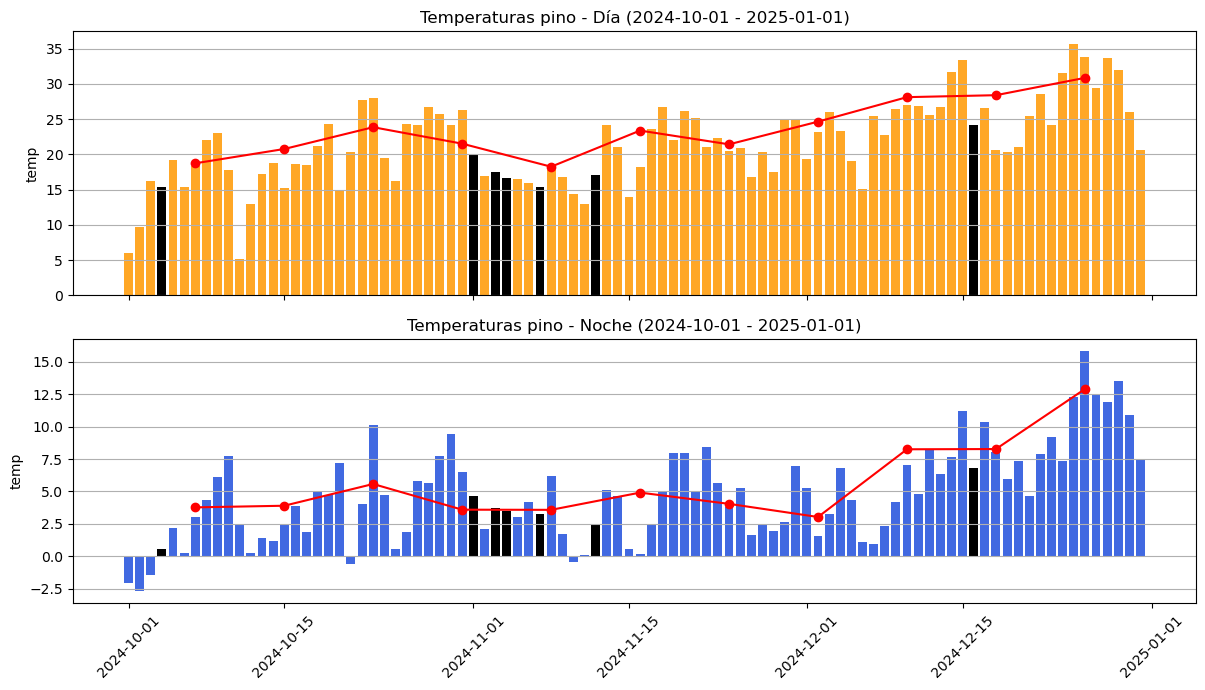

In [394]:
plot_2_series('2024-10-01', '2025-01-01', 'pino')

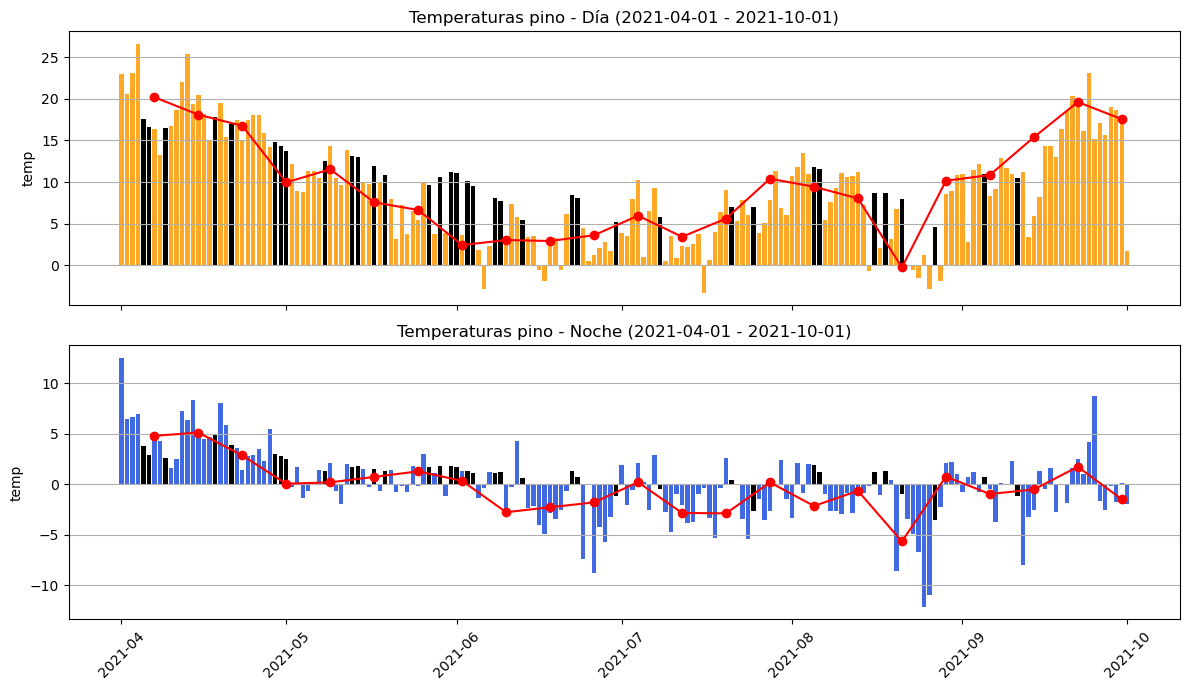

In [395]:
plot_2_series('2021-04-01', '2021-10-01', 'pino')

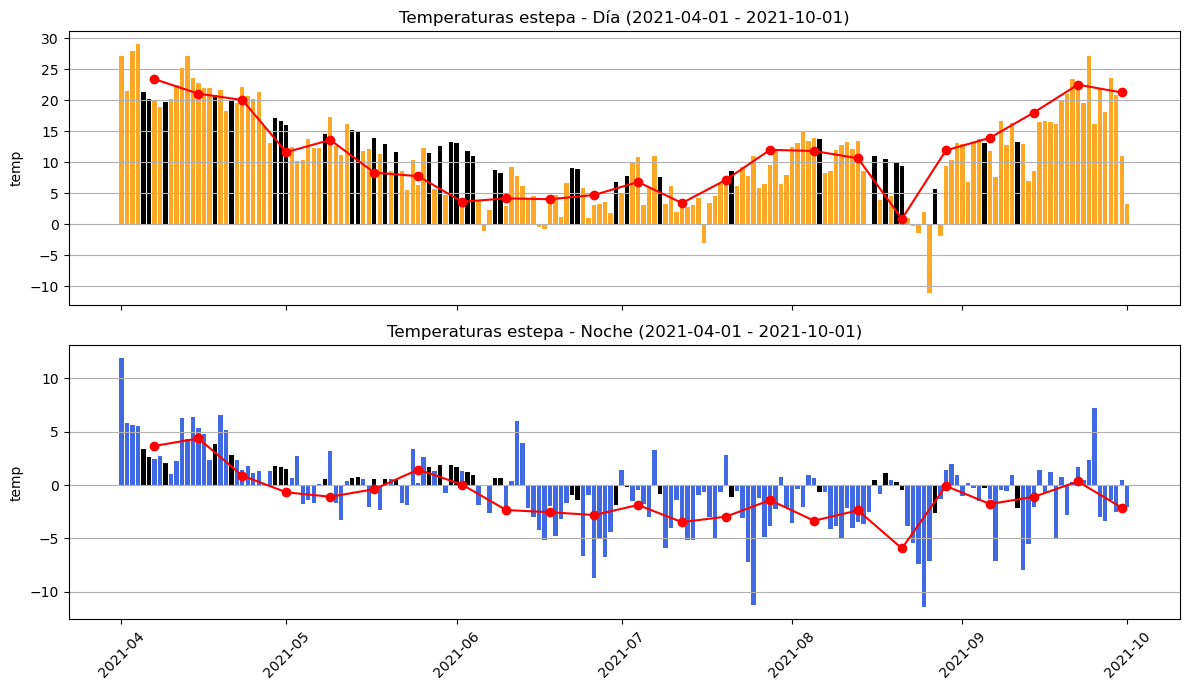

In [396]:
plot_2_series('2021-04-01', '2021-10-01', 'estepa')